In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
import pandas as pd
import astropy.units as u
import healpy as hp
import matplotlib.pyplot as plt

作业1

In [7]:
#1.获得NGC星表的位置
def process(i):
    catalogname = 'NGC '
    stri = '%d' %i
    galaxyname = catalogname+stri
    Pos = SkyCoord.from_name(galaxyname)
    ra = Pos.to_string('decimal').split(" ")[0]
    dec = Pos.to_string('decimal').split(" ")[1]
    ra = float(ra)
    dec = float(dec)

    print(i,galaxyname,ra,dec)

    return galaxyname,ra,dec


In [8]:
galaxynamear = np.array([])
raar = np.array([])
decar = np.array([])
for i in range(1,7841):
    galaxyname,ra,dec = process(i)
    galaxynamear = np.append(galaxynamear,galaxyname)
    raar = np.append(raar,ra)
    decar = np.append(decar,dec)


1 NGC 1 1.81607 27.7081
2 NGC 2 1.82132 27.6783
3 NGC 3 1.81999 8.30166
4 NGC 4 1.85167 8.375
5 NGC 5 1.95361 35.3623
6 NGC 6 2.0735 32.5057
7 NGC 7 2.08733 -29.915
8 NGC 8 2.18875 23.8386
9 NGC 9 2.22784 23.8169
10 NGC 10 2.14391 -33.8584
11 NGC 11 2.17706 37.4479
12 NGC 12 2.18642 4.61257
13 NGC 13 2.19881 33.4333
14 NGC 14 2.19263 15.817
15 NGC 15 2.26033 21.6246
16 NGC 16 2.26782 27.7294
17 NGC 17 2.77755 -12.1079
18 NGC 18 2.3483 27.7224
19 NGC 19 2.67031 32.983
20 NGC 20 2.38618 33.3087
21 NGC 21 2.6745 32.9724
22 NGC 22 2.45084 27.8323
23 NGC 23 2.47255 25.9237
24 NGC 24 2.48559 -24.9631
25 NGC 25 2.49704 -57.0208
26 NGC 26 2.60783 25.8319
27 NGC 27 2.63649 28.9962
28 NGC 28 2.60511 -56.9891
29 NGC 29 2.69546 33.3528
30 NGC 30 2.698 21.9557
31 NGC 31 2.66002 -56.9864
32 NGC 32 2.7226 18.789
33 NGC 33 2.7209 3.6724
34 NGC 34 2.77755 -12.1079
35 NGC 35 2.79372 -12.0208
36 NGC 36 2.84291 6.38934
37 NGC 37 2.8456 -56.9573
38 NGC 38 2.94579 -5.58633
39 NGC 39 3.0786 31.0611
40 NGC 40

In [9]:
catalog = pd.DataFrame([[galaxynamear, raar, decar]]
                     , columns=['galaxyname', 'ra', 'dec'])

In [10]:
print(catalog)

                                          galaxyname  \
0  [NGC 1, NGC 2, NGC 3, NGC 4, NGC 5, NGC 6, NGC...   

                                                  ra  \
0  [1.81607, 1.82132, 1.81999, 1.85167, 1.95361, ...   

                                                 dec  
0  [27.7081, 27.6783, 8.30166, 8.375, 35.3623, 32...  


In [11]:
##在赤道坐标系画出图
ra_E_cor = np.array(catalog['ra'][0])* u.deg
dec_E_cor = np.array(catalog['dec'][0])* u.deg

c = SkyCoord(ra=ra_E_cor, dec=dec_E_cor, frame='icrs')

fig = plt.figure(dpi=100,figsize=(10,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(c.ra.wrap_at(180*u.degree).radian, c.dec.radian,s=1)
plt.title('Equinoctial coordinate system',size=20)


Text(0.5, 1.0, 'Equinoctial coordinate system')

Text(0.5, 1.0, 'Galactic coordinate system')

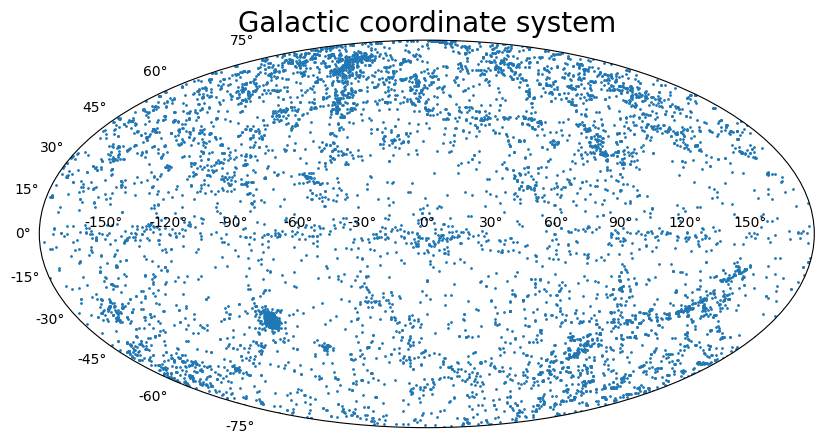

In [12]:
##在银道坐标系画出图
galactic_coords = c.galactic

fig = plt.figure(dpi=100,figsize=(10,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(galactic_coords.l.wrap_at(180*u.degree).radian, galactic_coords.b.radian,s=1)  
plt.title('Galactic coordinate system',size=20)


In [29]:
def distance(x1, y1, x2, y2):
    c1 = SkyCoord(ra=x1*u.degree, dec=y1*u.degree, frame='icrs')
    c2 = SkyCoord(ra=x2*u.degree, dec=y2*u.degree, frame='icrs')
    return c1.separation(c2).degree

def closest_points(x, y):
    min_distance = float('inf')
    closest_pair = None
    for i in range(len(x)):
        print(i)
        for j in range(i+1, len(x)):
            dist = distance(x[i], y[i], x[j], y[j])
            if (dist < min_distance)&(dist>0):
                min_distance = dist
                closest_pair = ((x[i], y[i]), (x[j], y[j]))
    return closest_pair

x = catalog['ra'][0]
y = catalog['dec'][0]
closest = closest_points(x, y)


In [10]:
print("NGC星表中最近的两个星系的距离是 {:.6} deg".format(closest))
#((306.278, -24.8092), (306.278, -24.8093))

NGC星表中最近的两个星系的距离是 0.0001 deg


NGC6908在NGC6907的一条悬臂的背景上，没办法分开
再比如NGC1575和NGC1577也叠在一起..
没办法做到完全让每个Pixel只有一个星系..


### SSY: NGC1577可能是个假的星系

In [21]:
#找到pixelsize小于最近的两个星系距离所需要的NSIDE
for i in range(5,50000):
    NSIDE = i
    if (hp.nside2resol(NSIDE, arcmin=True) / 60)<=closest:
        break
print(
    "Approximate resolution at NSIDE {} is {:.5} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 49999 is 0.0011727 deg


作业2

In [13]:
#第1题
lon = 110*np.pi/180
lat = 30*np.pi/180

NSIDE = 4096
NPIX = hp.nside2npix(NSIDE)
vec = hp.ang2vec(lon, lat)
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(2.5))
m = np.arange(NPIX)
m[ipix_disc] = m.max()

hp.mollview(m, title="",cbar=False, cmap=None)
hp.graticule(coord='E')


In [ ]:
### SSY: 方法讨巧，但是中心位置好像不对

黄色区域是LAMOST在（110，30）观测的范围

In [14]:
#第2题
#100kpc
L = 10**11 #Lsun
Re = 5 #kpc
M_sun_v_abs = 4.8
distance = 100 #kpc
M_MW_abs = M_sun_v_abs-2.5*np.log10(L/1) #mag
m= M_MW_abs+5*np.log10(distance*1e3)-5 #mag
print('m=',m)
arctpc = distance/1e3*np.pi/0.648  # 1 arcsecond corresponding to pc  
Re_appsize = Re*1e3/arctpc #arcsec
print("apprant size = {:.4} arcsec".format(Re_appsize))
M_MW_abs_Re = M_sun_v_abs-2.5*np.log10(L/2/(Re_appsize**2)/1) #mag/arcsec^2
m_Re= M_MW_abs_Re+5*np.log10(distance*1e3)-5 #mag/arcsec^2
print("mean surface brightness = {:.4} mag/arcsec^2".format(m_Re))

m= -2.6999999999999993
apprant size = 1.031e+04 arcsec
mean surface brightness = 18.12 mag/arcsec^2


In [15]:
#1Mpc
L = 10**11 #Lsun
Re = 5 #kpc
M_sun_v_abs = 4.8
distance = 100*1e3 #kpc
M_MW_abs = M_sun_v_abs-2.5*np.log10(L/1) #mag
m= M_MW_abs+5*np.log10(distance*1e3)-5 #mag
print('m=',m)
arctpc = distance/1e3*np.pi/0.648  # 1 arcsecond corresponding to pc  
Re_appsize = Re*1e3/arctpc #arcsec
print("apprant size = {:.4} arcsec".format(Re_appsize))
M_MW_abs_Re = M_sun_v_abs-2.5*np.log10(L/2/(Re_appsize**2)/1) #mag/arcsec^2
m_Re= M_MW_abs_Re+5*np.log10(distance*1e3)-5 #mag/arcsec^2
print("mean surface brightness = {:.4} mag/arcsec^2".format(m_Re))


m= 12.3
apprant size = 10.31 arcsec
mean surface brightness = 18.12 mag/arcsec^2


## 建议把题目抄上去，这样可以留存